In [10]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests
import csv
from datetime import datetime, timedelta

In [78]:
headers = ({'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36"})
list_pages = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450,500,550,600,650,700]
              
              # 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 8500, 8550, 8600, 8650, 8700, 8750, 8800, 8850, 8900, 8950, 9000, 9050, 9100, 9150, 9200, 9250, 9300, 9350, 9400, 9450, 9500, 9550, 9600, 9650, 9700, 9750, 9800, 9850, 9900, 9950, 10000, 10050, 10100, 10150, 10200, 10250, 10300, 10350, 10400, 10450, 10500, 10550, 10600, 10650, 10700, 10750, 10800, 10850, 10900, 10950, 11000, 11050, 11100, 11150, 11200, 11250, 11300, 11350, 11400, 11450, 11500, 11550, 11600, 11650, 11700, 11750, 11800, 11850, 11900, 11950, 12000]
list_countries = ["es", "ie", "fr", "it","at","be", "de","dk","fi","gb","gr","se","pl","ch","us","jp"]
position = []
company_name = []
rating = []
location = []
date_listed = []
salary = []


for i in list_pages: 
    try:
        website = "https://th.indeed.com/jobs?q=data+analyst&limit=50&radius=25&start={}".format(str(i))
        source = requests.get(website, headers=headers).text
        html_soup = BeautifulSoup(source, 'lxml')
        job_container = html_soup.find_all("div", class_="jobsearch-SerpJobCard unifiedRow row result")
        
        for j in range(len(job_container)):
            try:
                position.append(job_container[j].find_all("a", class_="jobtitle turnstileLink")[0].text.strip()) # title
            except IndexError:
                position.append(np.nan)
            try:
                company_name.append(job_container[j].find_all("span", class_="company")[0].text.strip()) # company
            except IndexError:
                company_name.append(np.nan)
            try:
                rating.append(job_container[j].find_all("span", class_="ratingsContent")[0].text.strip()) # rate
            except IndexError:
                rating.append(np.nan)
            try:
                location.append(job_container[j].find_all("span", class_="location accessible-contrast-color-location")[0].text.strip()) # loc
            except IndexError:
                location.append(np.nan)
            try:
                date_listed.append(job_container[j].find_all("span", class_="date")[0].text.strip()) # date
            except IndexError:
                date_listed.append(np.nan)
            try:
                salary.append(job_container[j].find_all("span", class_="salaryText")[0].text.strip()) # salary
            except IndexError:
                salary.append(np.nan)
                                
    except IndexError:
            pass

job_features = (list(zip(position, company_name, rating, location, date_listed, salary)))

data = pd.DataFrame(job_features, columns =["position", "company_name", "rating", "location", "date_listed", "salary"])

data.to_csv("data_analyst_indeed_switzertland.csv")    
    

In [11]:
df1 =  pd.read_csv("scraping the data/data_analyst_indeed_switzertland.csv")
df2 =  pd.read_csv("scraping the data/data_analyst_indeed_belgium.csv")
df3 =  pd.read_csv("scraping the data/data_analyst_indeed_england.csv")
df4 =  pd.read_csv("scraping the data/data_analyst_indeed_germany.csv")
df5 =  pd.read_csv("scraping the data/data_analyst_indeed_greece.csv")
df6 =  pd.read_csv("scraping the data/data_analyst_indeed_italy.csv")
df7 =  pd.read_csv("scraping the data/data_analyst_indeed_japan.csv")
df8 =  pd.read_csv("scraping the data/data_analyst_indeed_korea.csv")
df9 =  pd.read_csv("scraping the data/data_analyst_indeed_philipines.csv")
df10 =  pd.read_csv("scraping the data/data_analyst_indeed_spain.csv")
df11 =  pd.read_csv("scraping the data/data_analyst_indeed_sweden.csv")
df12 =  pd.read_csv("scraping the data/data_analyst_indeed_thailand.csv")
df13 =  pd.read_csv("scraping the data/data_analyst_indeed_usa.csv")

In [12]:
df1["country"] = "Switzerland"
df2["country"] = "Belgium"
df3["country"] = "England"
df4["country"] = "Germany"
df5["country"] = "Greece"
df6["country"] = "Italy"
df7["country"] = "Japan"
df8["country"] = "Korea"
df9["country"] = "Philipines"
df10["country"] = "Spain"
df11["country"] = "Sweden"
df12["country"] = "Thailand"
df13["country"] = "USA"

In [13]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

In [14]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
pd.set_option("display.max_rows", 90)

In [16]:
df["salary"] = df["salary"].str.replace(',', "").str.replace('.', "")
df["rating"] = df["rating"].str.replace(",", ".")

In [17]:
df["days"] = df["date_listed"].str.extract('(\d+)')
df["salary_year"] = df["salary"].str.extract('(\d+)+')

In [18]:
df=df.astype({"position":str, "company_name":str, "rating":float, "location":str, "date_listed":str, "salary":str, "country":str,"days":float,"salary_year":float})

In [19]:
df["days"].fillna(0, inplace=True)

In [20]:
def date_converter(num):
    if num != np.nan:
        return (datetime.today() - timedelta(days=int(num))).date()
    else:
        return np.nan

In [21]:
df.reset_index(inplace=True)

In [22]:
df.drop("index", axis=1, inplace=True)

In [23]:
df["date"] = df["days"].apply(date_converter)

In [24]:
df.drop("date_listed", axis=1, inplace=True)

In [25]:
# Putting salaries into eur
(df["salary_year"].loc[df["country"]=="England"]) = 1.11*df["salary_year"] # pounds to eur
(df["salary_year"].loc[df["country"]=="Japan"]) = 82*df["salary_year"] # japanese yens to eur
(df["salary_year"].loc[df["country"]=="Korea"]) = 0.00073*df["salary_year"]
(df["salary_year"].loc[df["country"]=="Philipines"]) = 0.018*df["salary_year"]
(df["salary_year"].loc[df["country"]=="Sweden"]) = 0.095*df["salary_year"]
(df["salary_year"].loc[df["country"]=="Thailand"]) = 0.028*df["salary_year"]
(df["salary_year"].loc[df["country"]=="USA"]) = 0.88*df["salary_year"]
(df["salary_year"].loc[df["country"]=="Switzerland"]) = 0.93*df["salary_year"]

C:\Users\enriq\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
filt_low = df["salary_year"] < 1000
filt_month_thai = df["salary"].str.contains("บาทต่อเดือน")
filt_week_thai = df["salary"].str.contains("บาทต่อสัปดาห์")
filt_week = df["salary"].str.contains("week")
filt_day = df["salary"].str.contains("day")
filt_hour = df["salary"].str.contains("hour")
filt_tag = df["salary"].str.contains("Tag")
filt_dag = df["salary"].str.contains("dag")
filt_mes = df["salary"].str.contains("mes")
filt_stunde = df["salary"].str.contains("Stunde")
filt_jahr = df["salary"].str.contains("Jahr")

In [28]:
(df["salary_year"].loc[filt_month_thai]) = 12*df["salary_year"]
(df["salary_year"].loc[filt_week_thai]) = 52*df["salary_year"]
(df["salary_year"].loc[filt_week]) = 52*df["salary_year"]
(df["salary_year"].loc[filt_day]) = 261*df["salary_year"]
(df["salary_year"].loc[filt_tag]) = 261*df["salary_year"]
(df["salary_year"].loc[filt_hour]) = 1914*df["salary_year"]
(df["salary_year"].loc[filt_dag]) = 261*df["salary_year"]
(df["salary_year"].loc[filt_mes]) = 12*df["salary_year"]
(df["salary_year"].loc[filt_stunde]) = 1914*df["salary_year"]

In [29]:
df.loc[df["salary_year"] > 100000]

,position,company_name,rating,location,salary,country,days,salary_year,date
2,Business Senior Analyst – Data Sourcing,CRISIL Limited,NaN,"Zürich, ZH",CHF 492 - CHF 644 pro Tag,Switzerland,4.0,119423.16,2020-06-12
80,RWA Business Analyst,Redempt Resourcing,NaN,"Zürich, ZH",CHF 450 pro Tag,Switzerland,30.0,109228.50,2020-05-17
252,Business Analyst Finance,Brevco Services,NaN,Brussel,€500 - €520 per dag,Belgium,3.0,130500.00,2020-06-13
921,Business Intelligence and Data Analyst (Inside...,Public Sector Resourcing,NaN,Leeds,£2174 - £2627 an hour,England,12.0,4618749.96,2020-06-04
946,Business Analyst (Contract) - DATA MAPPING EXP...,Carrington Recruitment Solutions,NaN,London W1A 1AB,£450 - £550 a day,England,6.0,130369.50,2020-06-10
957,Data Analyst,Global Enterprise Partners,NaN,London,£400 a day,England,2.0,115884.00,2020-06-14
991,Excel Data Analyst - Inside IR35,GCS Recruitment Specialists Ltd,NaN,London,£350 - £400 a day,England,30.0,101398.50,2020-05-17
1019,"Workday Data Analyst (SQL, EiB, HR Data Migrat...",Ampersand Consulting,NaN,London,£400 - £550 a day,England,30.0,115884.00,2020-05-17
1022,Data Analyst,OATS Recruitment,NaN,London SE1 2QH,£1949 - £2426 an hour,England,18.0,4140728.46,2020-05-29
1093,Data and Systems Analyst,Recroot,NaN,Barnet,£1503 an hour,England,4.0,3193183.62,2020-06-12


In [216]:
df.to_csv("data_analyst_all.csv")

In [50]:
df.isna().sum()

position           0
company_name       0
rating          3340
location           0
salary             0
country            0
days               0
salary_year     3764
date               0
dtype: int64

In [37]:
pivot = pd.pivot_table(df, index=["country"], values=["salary_year","rating"], aggfunc=["median","sem"]).reset_index()

In [38]:
pivot

index median                   sem               
                rating salary_year    rating    salary_year
0       Belgium   3.90    31200.00  0.029438    7473.787120
1       England    NaN    34815.15       NaN   65371.104212
2       Germany   3.80    60000.00  0.034795    8219.865417
3        Greece   3.75         NaN  0.114440            NaN
4         Italy   3.80    30000.00  0.049577    5300.157674
5         Japan    NaN    49200.00       NaN    7041.635968
6         Korea    NaN    25039.00       NaN            NaN
7         Spain   3.60    26000.00  0.025041    1577.224411
8        Sweden   3.70         NaN  0.111293            NaN
9   Switzerland    NaN   109228.50       NaN   38197.349496
10     Thailand    NaN     8400.00       NaN     825.101990
11          USA    NaN    50772.04       NaN  170647.853778

In [39]:
pivot.columns =  ["country", "rating", "salary", "sem_rating", "sem_year"]

In [40]:
pivot.sort_values(by="salary", inplace=True)

In [41]:
pivot

,country,rating,salary,sem_rating,sem_year
10,Thailand,NaN,8400.00,NaN,825.101990
6,Korea,NaN,25039.00,NaN,NaN
7,Spain,3.60,26000.00,0.025041,1577.224411
4,Italy,3.80,30000.00,0.049577,5300.157674
0,Belgium,3.90,31200.00,0.029438,7473.787120
1,England,NaN,34815.15,NaN,65371.104212
5,Japan,NaN,49200.00,NaN,7041.635968
11,USA,NaN,50772.04,NaN,170647.853778
2,Germany,3.80,60000.00,0.034795,8219.865417
9,Switzerland,NaN,109228.50,NaN,38197.349496


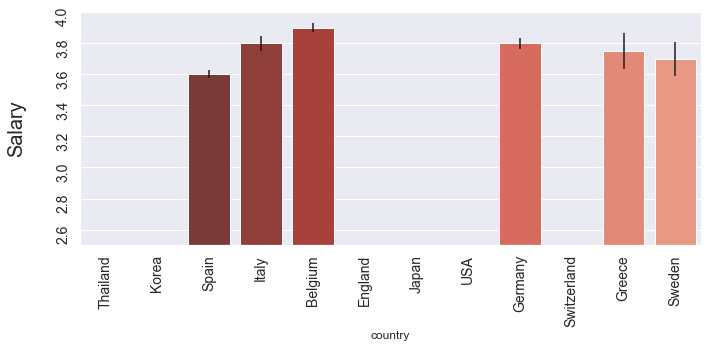

In [46]:
plt.rcParams["figure.figsize"] = (10,5)
# sns.barplot(x=pivot["country"],y=pivot["salary"], data=pivot, yerr=pivot["sem_year"], palette="Blues_d")
sns.barplot(x=pivot["country"],y=pivot["rating"], data=pivot, yerr=pivot["sem_rating"], palette="Reds_d")
plt.ylabel("Salary", fontsize=20, labelpad=30)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=14)
plt.ylim(2.5,4)
plt.tight_layout()
plt.savefig("rating_countries.png", dpi=400)
plt.show()

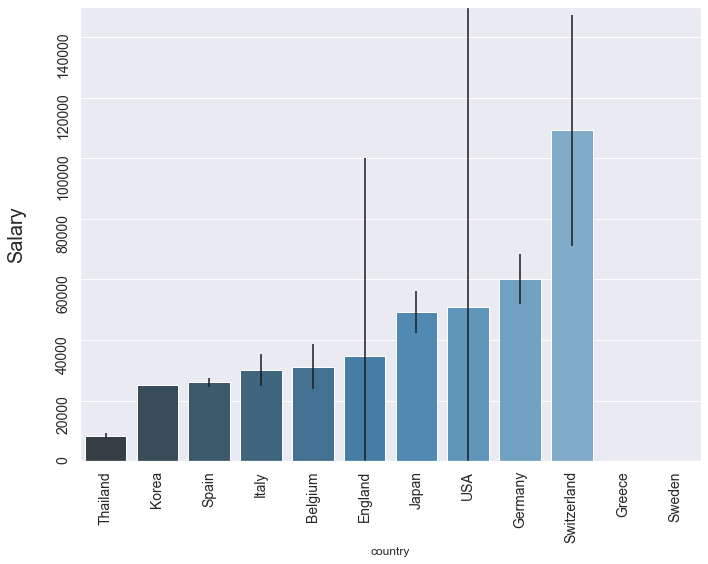

In [49]:
plt.rcParams["figure.figsize"] = (10,8)
sns.barplot(x=pivot["country"],y=pivot["salary"], data=pivot, yerr=pivot["sem_year"], palette="Blues_d")
plt.ylabel("Salary", fontsize=20, labelpad=30)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=14)
plt.ylim(0,150000)
plt.tight_layout()
plt.savefig("rating_countries.png", dpi=400)
plt.show()

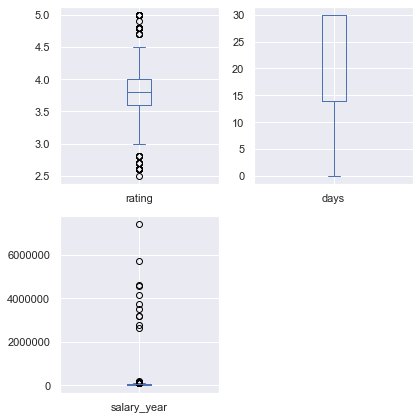

In [36]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6,6), color="b")
plt.tight_layout()
# plt.savefig("boxplots", dpi=400)
plt.show()